In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import torch
from skimage import io, transform

In [69]:
ANNOTATIONS = pd.read_csv('dataset/mask_df.csv')
NO_MASK_PATH = 'dataset/no_mask/'
MASK_PATH = 'dataset/mask/'
BAD_MASK_PATH = 'dataset/bad_mask/'
ANNOTATIONS.columns

Index(['image', 'class', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h', 'kp1_x',
       'kp1_y', 'kp2_x', 'kp2_y'],
      dtype='object')

In [67]:
# Helper function to show annotations. 
def show_frames(image, f):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.imshow(image)
    rect = pat.Rectangle((f["bbox_x"], f["bbox_y"]), f["bbox_w"], f["bbox_h"], fill = 0, color='g')
    plt.scatter(f["kp1_x"], f["kp1_y"])
    plt.scatter(f["kp2_x"], f["kp2_y"])
    ax.add_patch(rect)

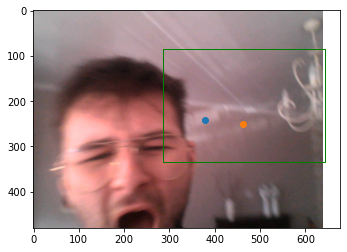

In [76]:
img = io.imread(NO_MASK_PATH + 'nm_32.jpg')

# Now... how will we be able to bound an image to the dataframe row once it's merged? 
# We'll need a common name convention.
# Hopefully Javi will figure something out ^^
show_frames(img, ANNOTATIONS.iloc[0])

In [79]:
# we'll be inheriting this and overriding __len__ and __getitem__ 
from torch.utils.data import Dataset 
import os 

class MasksDataset(Dataset):
    
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, idx):
        if isinstance(idx, torch.Tensor):
            idx = idx.tolist()
        
        img_name = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
        image = io.imread(img_name)
        anno = self.annotations.iloc[idx, 2:] # name, class , ....
        anno = np.array([anno]).astype('float').reshape(-1, 8)
        sample = {'image': image, 'annotations': anno}
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample

In [ ]:
# TO BE MODIFIED WHEN THE FINAL DATASET WILL BE KNOWN